## ДОМАШНЕЕ ЗАДАНИЕ

### **Задача:** повторите Begnners-туториал на датасете **Credit Card Fraud Detection**
```
import pandas as pd
url = "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv"
df = pd.read_csv(url)
# 284,807 транзакций, 28 анонимизированных признаков + Time + Amount
# Сильный дисбаланс (0.172% мошеннических)
```

Характеристика датасета:
- возможны выбросы и пропуски данных
- обратите внимание на баланс
- оценка precision/recall

### **Требования:**
1. **часть 1-2: анализ данных**
   - загрузите датасет `sklearn.datasets.load_iris()`
   - создайте 2 графика распределения классов
   - визуализируйте данные в 2D (выберите 2 любых признака)

2. **часть 3-5: подготовка и обучение**
   - разделите данные 70/30 с `stratify`
   - масштабируйте признаки
   - обучите SVM с линейным ядром

3. **часть 6: эксперименты**
   - попробуйте 3 разных значения C: 0.1, 1, 10
   - сравните accuracy каждой модели
   - выберите лучшую

4. **часть 7-8: оценка**
   - постройте матрицу ошибок для лучшей модели
   - вычислите precision, recall, F1-score
   - найдите и проанализируйте 2 примера ошибок

5. **часть 9: анализ**
   - постройте кривую обучения
   - ответьте: модель переобучается или недообучается?
   - что можно улучшить?

### **Формат сдачи:**
- **Colab ноутбук** с выполненным кодом
- **краткий отчет** (3-5 предложений) с выводами:
  - какая точность достигнута?
  - на каких классах чаще ошибается модель?
  - какие параметры SVM сработали лучше всего?

### **Критерии оценки:**
1. корректная загрузка и анализ данных
2. правильное разделение и масштабирование
3. обучение SVM с разными параметрами (показать, что вы делали как минимум 2 прогона с разными гиперпараметрами, 1 прогон даёт 1 балл)
4. визуализация матрицы ошибок
5. вычисление метрик precision, recall, F1
6. построение кривой обучения
7. представлены ответы на все вопросы из списка требований

### **Дедлайн:** 14 февраля, 23:59 в свои учебные репозитории

## Импорт

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

## 1. Анализ данных

In [ ]:
url = "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv"
df = pd.read_csv(url)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


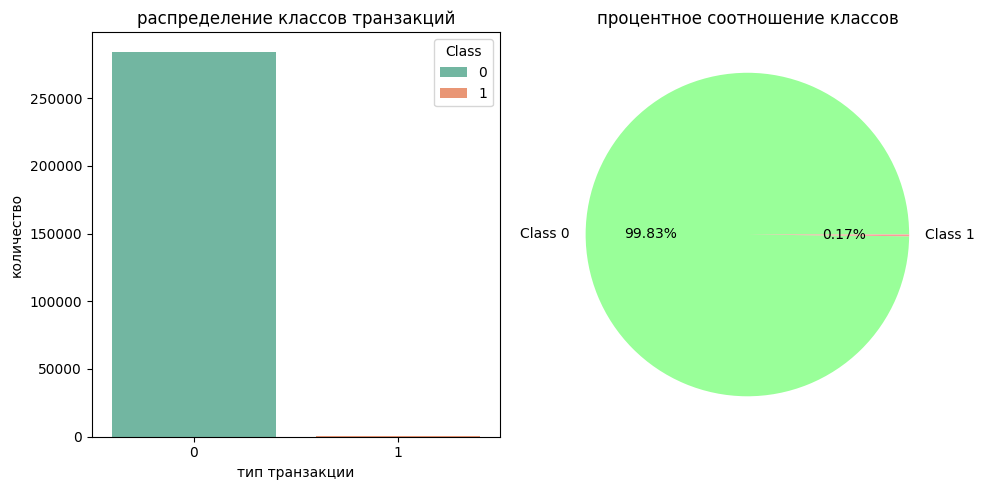

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# гистограмма по классам
sns.countplot(x='Class', data=df, ax=axes[0], hue='Class', palette='Set2')
axes[0].set_title('распределение классов транзакций')
axes[0].set_xlabel('тип транзакции')
axes[0].set_ylabel('количество')

# круговая диаграмма
class_counts = df['Class'].value_counts()
plt.pie(class_counts, labels=['Class 0', 'Class 1'], autopct='%1.2f%%', colors=['#99ff99','#ff9999'])
axes[1].set_title('процентное соотношение классов')

plt.tight_layout()
plt.show()

- Данные сильно несбалансированы: доминирует нулевой класс, мошеннических транзакций всего 0.172%
- Для корректировки дисбаланса можно применить undersampling (нескольких сотен примеров хватит для обучения SVM)

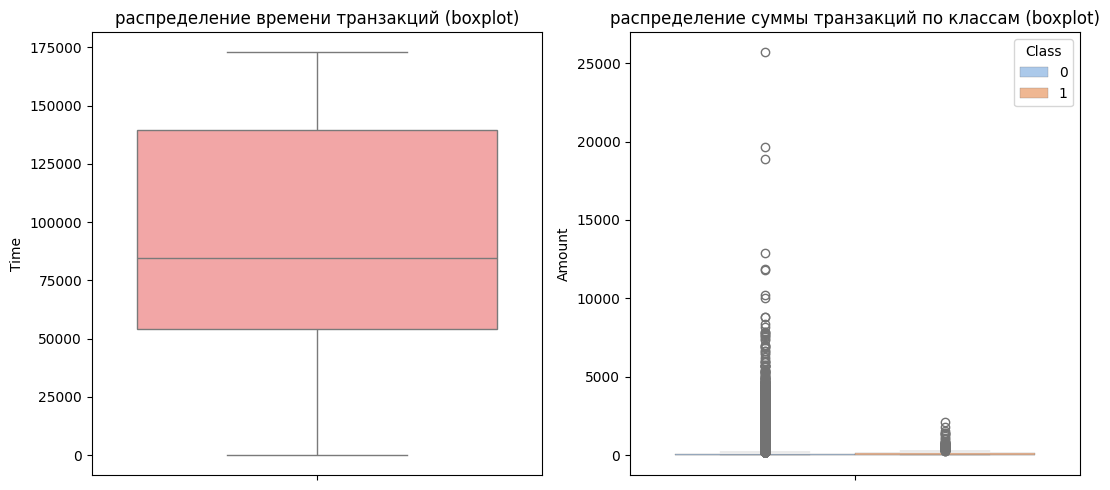

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5))

# boxplot признака Time
sns.boxplot(df['Time'], ax=axes[0], color='#ff9999')
axes[0].set_title('распределение времени транзакций (boxplot)')

# boxplot признака Amount
sns.boxplot(data=df, y='Amount', ax=axes[1], hue='Class',
            palette='pastel', linewidth=.2)
axes[1].set_title('распределение суммы транзакций по классам (boxplot)')

plt.tight_layout()
plt.show()

- Значения Time последовательно возрастают, судя по всему, это просто отметка времени, когда была совершена транзакция → этот столбец нужно исключить из признаков для обучения
- Признак Amount (сумма транзакции) может влиять на предсказание класса, но по значениям очень много выбросов, особенно в классе 0 → нужно очистить от выбросов или удалить из обучающих данных

### Undersampling

In [ ]:
first_class_df = df[df['Class'] == 1]
print(f"Количество мошеннических транзакций (класс 1): {len(first_class_df)}")

# выбираем рандомно такое же количество из нулевого класса (для соотношения классов 50/50)
df_null_sample = df[df['Class'] == 0].sample(n=len(first_class_df), random_state=42)
df_undersamp = pd.concat([first_class_df, df_null_sample])
print(f'\nРазмерность датасета после undersampling: {df_undersamp.shape}')

Количество мошеннических транзакций (класс 1): 492

Размерность датасета после undersampling: (984, 31)


In [ ]:
X = df_undersamp.drop(['Class', 'Time', 'Amount'], axis=1)
y = df_undersamp['Class']

feature_names = X.columns.to_list()
target_names = ['0', '1']

print(f"размер данных: {X.shape}")
print(f"количество классов: {len(np.unique(y))}")
print(f"классы: {target_names}")
print(f"признаки: {feature_names}")

размер данных: (984, 28)
количество классов: 2
классы: ['0', '1']
признаки: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']


### Поиск корреляций признаков

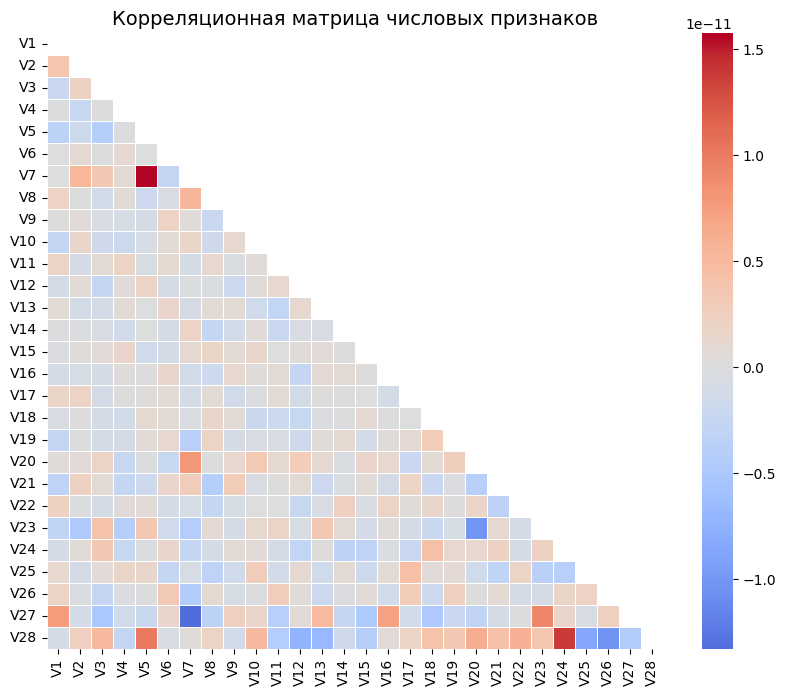


Сильных или умеренных корреляций между признаками не обнаружено


In [ ]:
# Визуализация корреляций как тепловая карта
plt.figure(figsize=(10, 8))
corr_matrix = df[feature_names].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Маска для верхнего треугольника

sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm',
            center=0, square=True, linewidths=.5) # Убрали аннотацию для лучшей читаемости, т.к. она неинформативна
plt.title('Корреляционная матрица числовых признаков', fontsize=14)
plt.show()

# Выявляем проблемные корреляции
high_correlations = []
for i in range(len(feature_names)):
    for j in range(i+1, len(feature_names)):
        feat1, feat2 = feature_names[i], feature_names[j]
        corr = corr_matrix.loc[feat1, feat2]
        if abs(corr) > 0.4:
            high_correlations.append((feat1, feat2, corr))

if high_correlations:
    print("Найдены сильно или умеренно коррелирующие пары признаков:")
    for feat1, feat2, corr in high_correlations:
        print(f"  {feat1} <-> {feat2}: r = {corr:.2f}")
else:
    print("\nСильных или умеренных корреляций между признаками не обнаружено")

## 2. Подготовка и обучение

In [ ]:
# разделяем данные (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"train size: {X_train.shape}")
print(f"test size: {X_test.shape}")
print(f"train class distribution: {np.bincount(y_train)}")
print(f"test class distribution: {np.bincount(y_test)}")

train size: (688, 28)
test size: (296, 28)
train class distribution: [344 344]
test class distribution: [148 148]


In [ ]:
# создаем и обучаем модель
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# предсказания
y_pred_linear = svm_linear.predict(X_test)

# оценка
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"линейный SVM accuracy: {accuracy_linear:.2%}")
print("\nclassification report:")
print(classification_report(y_test, y_pred_linear, target_names=target_names))

линейный SVM accuracy: 93.92%

classification report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       148
           1       0.95      0.93      0.94       148

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



### Масштабирование признаков

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # только transform, не fit!

print("пример до масштабирования (первые 3 признака):")
print(X_train.values[0,:3])
print("\nпример после масштабирования (первые 3 признака):")
print(X_train_scaled[0,:3])

пример до масштабирования (первые 3 признака):
[-3.55217282  5.42646055 -3.73181032]

пример после масштабирования (первые 3 признака):
[-0.17422928  0.90603356  0.00547364]


In [ ]:
# создаем и обучаем модель
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# предсказания
y_pred_linear = svm_linear.predict(X_test_scaled)

# оценка
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"линейный SVM accuracy: {accuracy_linear:.2%}")
print("\nclassification report:")
print(classification_report(y_test, y_pred_linear, target_names=target_names))

линейный SVM accuracy: 94.59%

classification report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       148
           1       0.98      0.91      0.94       148

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



После масштабирования показатель точности классификации возрос примерно на 0.7%: precision (класс 1) и recall (класс 0) повысились, однако recall (класс 1) и precision (класс 0) понизились, что скорее негативно отражается на эффективности решения задачи выявления мошенничества (здесь цель - максимизировать recall класса 1).

## 3. Эксперименты

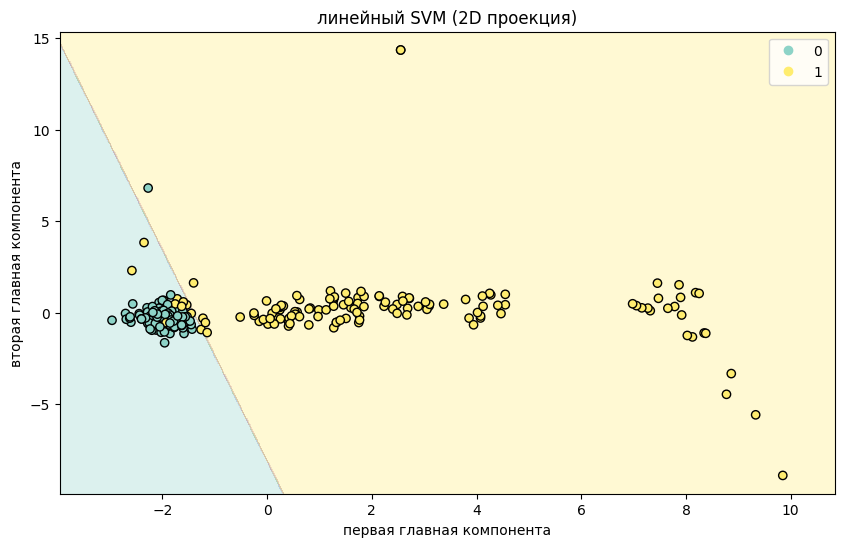

In [ ]:
# используем PCA для уменьшения до 2D для визуализации
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

# создаем сетку для границы
def plot_decision_boundary_2d(model, X, y, title):
    h = .02  # шаг сетки
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # предсказание для каждой точки сетки
    Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set3')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='Set3')
    plt.xlabel('первая главная компонента')
    plt.ylabel('вторая главная компонента')
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=list(target_names))
    plt.show()

plot_decision_boundary_2d(svm_linear, X_test_pca, y_test, "линейный SVM (2D проекция)")

Данные в целом неплохо отделяются прямой, однако на границе классов заметно, что модель чаще ошибается, относя объекты первого класса в нулевой, что при определении мошеннических транзакций хуже, чем наоборот.

Пробуем ядро RBF:

In [ ]:
# SVM с RBF ядром (по умолчанию)
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

y_pred_rbf = svm_rbf.predict(X_test_scaled)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF SVM accuracy: {accuracy_rbf:.2%}")
print("\nclassification report:")
print(classification_report(y_test, y_pred_rbf, target_names=target_names))

RBF SVM accuracy: 93.92%

classification report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       148
           1       0.97      0.91      0.94       148

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



Качество модели с RBF ядром понизилось менее чем на 1%, "пострадали" и precision, и recall.

Для выбора лучших параметров проанализируем разные значения C и типы ядра:

kernel='linear', C=0.01: accuracy = 91.22%
kernel='rbf', C=0.01: accuracy = 85.14%
kernel='linear', C=0.1: accuracy = 94.93%
kernel='rbf', C=0.1: accuracy = 91.89%
kernel='linear', C=1: accuracy = 94.59%
kernel='rbf', C=1: accuracy = 93.92%
kernel='linear', C=10: accuracy = 93.92%
kernel='rbf', C=10: accuracy = 92.91%
kernel='linear', C=100: accuracy = 93.92%
kernel='rbf', C=100: accuracy = 93.24%


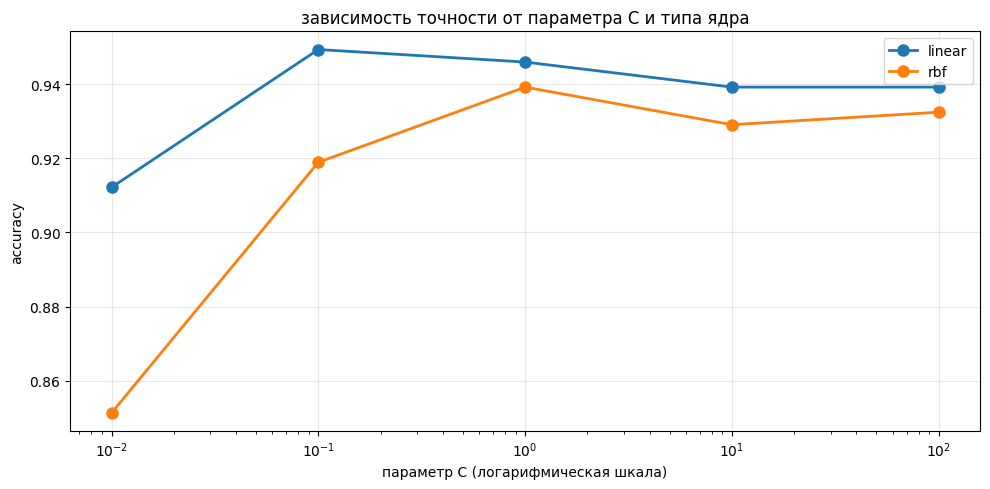

In [ ]:
# пробуем разные значения C и ядра
C_values = [0.01, 0.1, 1, 10, 100]
kernels = ['linear', 'rbf']
accuracies = []

for C in C_values:
    for kernel in kernels:
        svm_temp = SVC(kernel=kernel, C=C, random_state=42)
        svm_temp.fit(X_train_scaled, y_train)
        acc = svm_temp.score(X_test_scaled, y_test)
        accuracies.append([kernel, C, acc])
        print(f"kernel='{kernel}', C={C}: accuracy = {acc:.2%}")

# график зависимости accuracy от C и ядра
plt.figure(figsize=(10, 5))
accuracies_df = pd.DataFrame(accuracies, columns=['kernel', 'C', 'accuracy'])
for kernel in kernels:
    kernel_data = accuracies_df[accuracies_df['kernel'] == kernel]
    plt.plot(kernel_data['C'], kernel_data['accuracy'],
             marker='o', linewidth=2, markersize=8, label=f'{kernel}')
plt.xscale('log')
plt.xlabel('параметр C (логарифмическая шкала)')
plt.ylabel('accuracy')
plt.title('зависимость точности от параметра C и типа ядра')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## 4. Оценка и анализ результатов

In [ ]:
# используем найденные лучшие параметры
best_svm = SVC(kernel='linear', C=0.1, random_state=42)
best_svm.fit(X_train_scaled, y_train)

y_pred_best = best_svm.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"лучшая SVM accuracy: {accuracy_best:.2%}")

лучшая SVM accuracy: 94.93%


Лучшая комбинация: C = 0.1 и линейное ядро, достигается точность - 94.93%

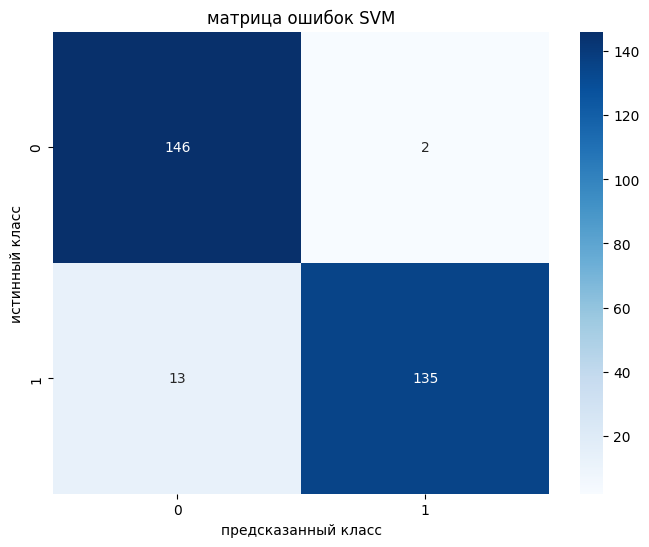

In [ ]:
# вычисляем матрицу ошибок
cm = confusion_matrix(y_test, y_pred_best)

# визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('предсказанный класс')
plt.ylabel('истинный класс')
plt.title('матрица ошибок SVM')
plt.show()

In [ ]:
print("детальный отчет по классификации:")
print(classification_report(y_test, y_pred_best, target_names=target_names))

# вычисляем дополнительные метрики вручную
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

print(f"\nитоговые метрики:")
print(f"precision: {precision:.2%}    # точность (сколько из предсказанных правильные)")
print(f"recall:    {recall:.2%}    # полнота (сколько из реальных нашли)")
print(f"F1-score:  {f1:.2%}    # баланс precision и recall")

детальный отчет по классификации:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       148
           1       0.99      0.91      0.95       148

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296


итоговые метрики:
precision: 95.18%    # точность (сколько из предсказанных правильные)
recall:    94.93%    # полнота (сколько из реальных нашли)
F1-score:  94.93%    # баланс precision и recall


In [ ]:
# находим индексы ошибок
error_indices = y_test[y_pred_best != y_test].index.to_list()

print(f"количество ошибок: {len(error_indices)}")

if len(error_indices) > 0:
    print("\nпримеры ошибок:")

    for i, idx in enumerate(error_indices[:5]):  # покажем первые 5
        print(f"\nошибка {i+1}:")
        print(f"  истинный класс: {target_names[y_test[idx]]}")
        print(f"  предсказанный:  {target_names[y_pred_best[y_test.index.to_list().index(idx)]]}")
        # в случае бинарной классификации одно значение вероятности по шкале Платта
        print(f"  вероятности классов: {best_svm.decision_function(X_test_scaled[y_test.index.to_list().index(idx):y_test.index.to_list().index(idx)+1])}")

количество ошибок: 15

примеры ошибок:

ошибка 1:
  истинный класс: 0
  предсказанный:  1
  вероятности классов: [0.18664669]

ошибка 2:
  истинный класс: 1
  предсказанный:  0
  вероятности классов: [-1.53089893]

ошибка 3:
  истинный класс: 1
  предсказанный:  0
  вероятности классов: [-0.50468443]

ошибка 4:
  истинный класс: 1
  предсказанный:  0
  вероятности классов: [-1.10585706]

ошибка 5:
  истинный класс: 1
  предсказанный:  0
  вероятности классов: [-0.53953644]


Модель чаще ошибается на объектах первого класса (13/146), также неверно классифицированы 2 объекта нулевого класса. Вероятно, это происходит из-за смешения или слишком плотного расположения некоторых объектов обоих классов в пространстве признаков. Так как признаки анонимизированы, экспертно оценить сходство конкретных ошибочно классифицированных транзакций мы не можем.

### Анализ обучения SVM

In [ ]:
print(f"количество support vectors: {len(best_svm.support_vectors_)}")
print(f"количество support vectors по классам: {best_svm.n_support_}")
print(f"процент точек, являющихся support vectors: {len(best_svm.support_vectors_)/len(X_train):.1%}")

количество support vectors: 136
количество support vectors по классам: [70 66]
процент точек, являющихся support vectors: 19.8%


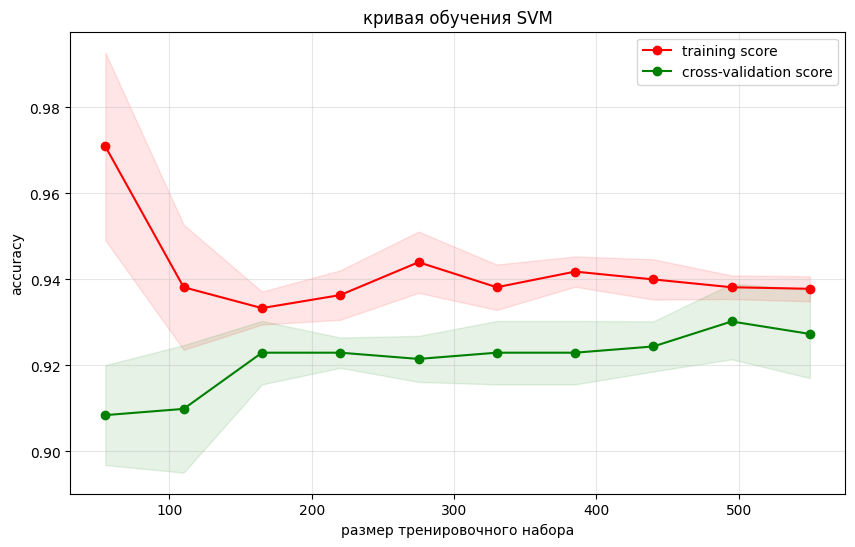

In [ ]:
# вычисляем learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_svm, X_train_scaled, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# средние значения
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# график
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.xlabel('размер тренировочного набора')
plt.ylabel('accuracy')
plt.title('кривая обучения SVM')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()

Кривые обучения сходятся (переобучения нет), однако степень обобщения не самая высокая (возможно небольшое недообучение). Потенциально добавление обучающих данных могло бы сделать модель лучше.

### Отчет

При выборе значения гиперпараметра C = 0.1 и линейного типа ядра достигается максимальная точность, равная 94.93%. Модель чаще ошибается на классе 1, определяя его как класс 0. На визуализации с помощью PCA видно, что ошибочно классифицируемые объекты находятся в зоне, где классы трудноразделимы (точки сливаются или находятся вплотную друг к другу). Можно предположить, что такое распределение отражает реальное состояние финансовых транзакций, когда некоторые из мошенников очень хорошо маскируются под добросовестных пользователей. В целом, можно сделать вывод о достаточно высоком качестве полученной модели, учитывая ограниченное количество обучающих данных.


